# EDA 작업

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

ModuleNotFoundError: No module named 'matplotlib'

In [24]:
dataset = pd.read_csv('../../../dataset/train/train.csv')
dataset.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


우선 subject_entity와 object_entity의 json 형태의 데이터를 분리해서 확인하자

In [25]:
dataset.subject_entity[0]

"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}"

In [31]:
dataset.object_entity[0]

"{'word': '조지 해리슨', 'start_idx': 13, 'end_idx': 18, 'type': 'PER'}"

In [32]:
subject_word, subject_idx, subject_type = [], [], []
object_word, object_idx, object_type = [], [], []

for subject_entity, object_entity in zip(dataset['subject_entity'], dataset['object_entity']):
    subject_dict = eval(subject_entity)
    object_dict = eval(object_entity)
    
    subject_word.append(subject_dict['word'])
    subject_idx.append((subject_dict['start_idx'], subject_dict['end_idx']))
    subject_type.append(subject_dict['type'])
    object_word.append(object_dict['word'])
    object_idx.append((object_dict['start_idx'], object_dict['end_idx']))
    object_type.append(object_dict['type'])


In [33]:
out_dataset = pd.DataFrame({
    'id': dataset['id'], 
    'sentence': dataset['sentence'],
    'subject_word': subject_word,
    'subject_idx': subject_idx,
    'subject_type': subject_type,
    'object_word': object_word,
    'object_idx': object_idx,
    'object_type': object_type,
    'label': dataset['label'],
    'source': dataset['source']
})

In [34]:
out_dataset.head()

,id,sentence,subject_word,subject_idx,subject_type,object_word,object_idx,object_type,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,비틀즈,"(24, 26)",ORG,조지 해리슨,"(13, 18)",PER,no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,민주평화당,"(19, 23)",ORG,대안신당,"(14, 17)",ORG,no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,광주FC,"(21, 24)",ORG,한국프로축구연맹,"(34, 41)",ORG,org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,아성다이소,"(13, 17)",ORG,박정부,"(22, 24)",PER,org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,요미우리 자이언츠,"(22, 30)",ORG,1967,"(0, 3)",DAT,no_relation,wikipedia


label의 갯수나 sentence 등에 대한 정보를 정리한다.

### label 분포 확인

In [36]:
out_dataset.label.value_counts()

no_relation                            9534
org:top_members/employees              4284
per:employee_of                        3573
per:title                              2103
org:member_of                          1866
org:alternate_names                    1320
per:origin                             1234
org:place_of_headquarters              1195
per:date_of_birth                      1130
per:alternate_names                    1001
per:spouse                              795
per:colleagues                          534
per:parents                             520
org:founded                             450
org:members                             420
per:date_of_death                       418
org:product                             380
per:children                            304
per:place_of_residence                  193
per:other_family                        190
per:place_of_birth                      166
org:founded_by                          155
per:product                     

<AxesSubplot:>

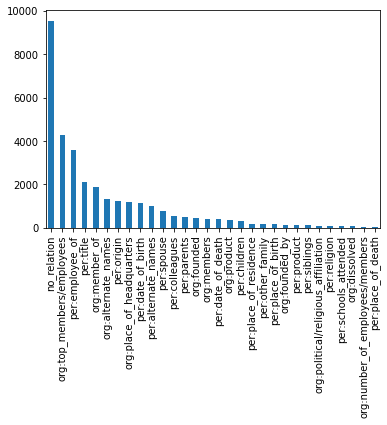

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

out_dataset.label.value_counts().plot(kind="bar")

보다시피 데이터의 불균형이 엄청 심한 것을 확인할 수 있다.  
no_relation data를 줄이고 다른 class들의 데이터를 증강하는 방법에 대해서 고민해봐야할 것 같다.

<AxesSubplot:>

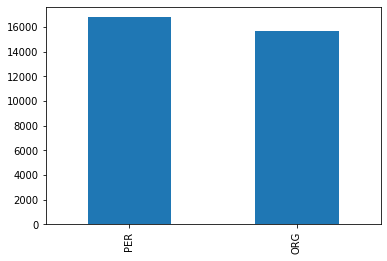

In [56]:
out_dataset.subject_type.value_counts().plot(kind="bar")

<AxesSubplot:>

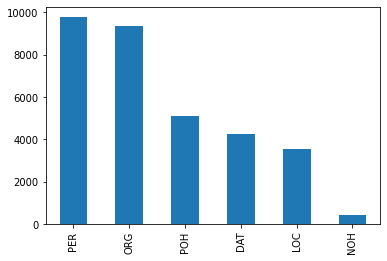

In [57]:
out_dataset.object_type.value_counts().plot(kind="bar")

PER = 인명  
ORG = 기관명  
POH = 기타 (title 과 비슷한 느낌)  
DAT = 날짜  
LOC = 지명  
NOH = 기타 수량표현  

[organization]  
org:dissolved                       : 지정된 조직이 해산된 날짜  
org:founded                         : 지정된 조직이 설립된 날짜  
org:place_of_headqueaters           : 지정된 조직의 본부가 있는 장소(본사위치)  
org:alternate_names                 : 지정된 조직을 참조하기 위해 사무실 이름 대신 호출되는 대체 이름  
org:member_of                       : 지정된 조직이 속한 조직  
org:members                         : 지정된 조직에 속한 조직  
org:political/religious_affiliation : 지정된 조직이 소속된 정치/종교 단체  
org:product                         : 특정 조직에서 생산한 제품 또는 상품  
org:founded_by                      : 특정 조직을 설립한 사람 또는 조직  
org:top_members/employees           : 지정된 조직의 대표 또는 구성원  
org:number_of_employees/members     : 지정된 조직에 소속된 총 구성원 수  
-----------------------------------------------------------------------  
[person]  
per:date_of_birth     : 지정된 사람이 태어난 날짜  
per:date_of_death     : 지정된 사람이 사망한 날짜  
per:place_of_birth    : 특정인이 사망한 날짜  
per:place_of_death    : 특정인이 사망한 장소  
per:place_of_residence: 지정된 사람이 사는 곳  
per:origin            : 특정인의 출신 또는 국적  
per:employee_of       : 지정된 사람이 일하는 조직  
per:schools_attended  : 지정된 사람이 다녔던 학교  
per:alternate_names   : 지정된 사람을 지칭하기 위해 공식 이름 대신에 부르는 대체 이름  
per:parents           : 지정된 사람의 부모  
per:children          : 지정된 사람의 자녀  
per:siblings          : 특정인의 형제자매  
per:spouse            : 특정인의 배우자  
per:other_family      : 부모, 자녀, 형제자매 및 배우자를 제외한 특정인의 가족  
per:colleagues        : 지정된 사람과 함께 일하는 사람들  
per:product           : 특정인이 제작한 제품 또는 작품  
per:religion          : 특정인이 믿는 종교  
per:title             : 특정인의 직위를 나타내는 공식 또는 비공식 이름  

In [64]:
out_dataset[out_dataset.object_type == 'POH']

,id,sentence,subject_word,subject_idx,subject_type,object_word,object_idx,object_type,label,source
11,11,이른바 'Z세대'로 불리는 1990년대 중반 이후 태어난 세대에게 대표 아이콘으로 ...,빌리 아일리시,"(60, 66)",PER,싱어송라이터,"(53, 58)",POH,per:title,wikitree
24,24,FA로 친정 팀에 돌아온 중견수 이택근과 1루수로 정착한 박병호와 함께 클린업 트리...,박병호,"(32, 34)",PER,1루수,"(23, 25)",POH,per:title,wikipedia
30,30,미국 정부는 1942년 2월 24일 전 세계의 청취자를 대상으로 태평양 전쟁의 전쟁...,미국의 소리,"(61, 66)",ORG,Voice of America,"(73, 88)",POH,org:alternate_names,wikipedia
38,38,광주국악상설공연이 세계수영선수권대회 기간동안 연이어 매진을 기록하며 광주 대표 문화...,박애리,"(74, 76)",PER,국악인,"(70, 72)",POH,per:title,wikitree
41,41,"이 캐릭터가 작가 스탠 리와 만화가 잭 커비가 만든 """" 에서 캡틴 아메리카의 전쟁...",스탠 리,"(10, 13)",PER,만화가,"(16, 18)",POH,no_relation,wikipedia
...,...,...,...,...,...,...,...,...,...,...
32444,32444,"10월 28일에 은퇴 관련 기자회견을 하였으며, 11월 1일 전주에서 열린 대구 F...",대구 FC,"(42, 46)",ORG,K리그1,"(50, 53)",POH,org:member_of,wikipedia
32446,32446,"8월 2일에는 이정모 서울시립과학관 관장 ‘알바트로스’를 주제로, 9일에는 금정연 ...",이정모,"(8, 10)",PER,서울시립과학관 관장,"(12, 21)",POH,per:title,wikitree
32458,32458,"대학 졸업 직후, 그는 '스티어 프라이데이 나이트(Stir Friday Night)...",스티어 프라이데이 나이트,"(14, 26)",ORG,Stir Friday Night,"(28, 44)",POH,org:alternate_names,wikipedia
32462,32462,심지어 전용 연습구장도 없어 훈련을 여러 지역을 돌아다니며 해야 할 정도로 팀 사정...,방승환,"(85, 87)",PER,공격수,"(94, 96)",POH,no_relation,wikipedia


NOH가 뭐길래 저렇게 데이터가 조금 있는지 살펴보자

In [62]:
out_dataset[out_dataset.object_type == 'NOH']

,id,sentence,subject_word,subject_idx,subject_type,object_word,object_idx,object_type,label,source
72,72,냉전 동안 독일 연방군은 NATO의 서유럽 방위의 주력군이 되었으며 전군을 통틀어 ...,독일 연방군,"(6, 11)",ORG,"49만 5,000명","(46, 55)",NOH,org:number_of_employees/members,wikipedia
107,107,고양시청 종합상황실에서는 연휴기간동안 09:00 ~ 18:00까지 민원콜센터(031...,고양시,"(0, 2)",ORG,031-909-9000,"(43, 54)",NOH,no_relation,wikitree
109,109,"당시 김신영 씨는 ""현재 48kg이다. 골반은 조금 더 작아졌지만 크게 달라진 건 ...",김신영,"(3, 5)",PER,48kg,"(14, 17)",NOH,no_relation,wikitree
192,192,"1992년에 JSL 1부, 2부 총 28개팀 중 J리그에 참가하지 않겠다고 한 18...",J리그,"(27, 29)",ORG,18팀,"(44, 46)",NOH,no_relation,wikipedia
194,194,(해멀스는 8이닝 1실점을 기록하지만 디키의 호투 때문에 패가 된다). 2011년 ...,뉴욕 메츠,"(55, 59)",ORG,500만,"(87, 90)",NOH,no_relation,wikipedia
...,...,...,...,...,...,...,...,...,...,...
32303,32303,2017년 제48회 일본 중의원 의원 총선거에서는 홋카이도 제1구에서 요코미치 의원...,미치시타 다이키,"(64, 71)",PER,홋카이도 제1구,"(28, 35)",NOH,no_relation,wikipedia
32329,32329,"순천시에서 관리하고 있는 13개 사회보장급여(국민기초, 한부모, 장애연금, 기초연금...",순천시,"(0, 2)",ORG,13개,"(14, 16)",NOH,no_relation,wikitree
32356,32356,강화군노인복지관이 이달 16일 농촌마을지킴이사업을 시작으로 27일까지 2주간 8회에...,강화군,"(0, 2)",ORG,12개,"(61, 63)",NOH,no_relation,wikitree
32448,32448,전북 14개 지자체가 공개한 자료에 따르면 ▲익산시가 지난 5년간 32억6540만원...,익산시,"(25, 27)",ORG,14개,"(3, 5)",NOH,no_relation,wikitree


In [63]:
out_dataset[out_dataset.object_type == 'NOH'].label.value_counts()

no_relation                        310
org:number_of_employees/members     48
per:title                           19
org:member_of                        9
per:employee_of                      6
org:alternate_names                  5
per:date_of_birth                    2
org:members                          2
per:date_of_death                    2
org:place_of_headquarters            2
per:children                         2
per:origin                           2
org:top_members/employees            1
per:parents                          1
org:product                          1
per:alternate_names                  1
Name: label, dtype: int64

'수치값' 이런 느낌인 것 같다. 연관된 label 로는 number_of_employees/members 만이 적합하지 않을까라는 생각이 든다.  
나머지 label에 매핑된 값들은 데이터 검증이 필요할 것 같다.

In [69]:
out_dataset[(out_dataset.object_type == 'NOH') & (out_dataset.label == 'per:alternate_names')]

,id,sentence,subject_word,subject_idx,subject_type,object_word,object_idx,object_type,label,source
17912,17912,"생모는 화의옹주 김씨(和義翁主 金氏, ~1428)로 김씨는 본래 칠점선(七點仙)의 ...",화의옹주,"(4, 7)",PER,칠점선(七點仙),"(36, 43)",NOH,per:alternate_names,wikipedia


In [184]:
label_check = 'per:children'
type_check = 'DAT'

In [185]:
out_dataset[out_dataset.label == label_check].subject_type.value_counts()

PER    304
Name: subject_type, dtype: int64

In [186]:
out_dataset[out_dataset.label == label_check].object_type.value_counts()

PER    275
POH     22
LOC      3
NOH      2
DAT      1
ORG      1
Name: object_type, dtype: int64

In [161]:
out_dataset[(out_dataset.label == label_check) & (out_dataset.object_type == type_check)].head()

,id,sentence,subject_word,subject_idx,subject_type,object_word,object_idx,object_type,label,source
17115,17115,"광주에서 태어난 이한위 배우는 조대부고와 조선대 정밀기계공학과를 졸업하고, 1983년 KBS 10기 공채 탤런트에 합격하며 배우 생활을 시작했다.",이한위,"(9, 11)",PER,KBS 10기 공채 탤런트,"(48, 61)",DAT,per:title,wikitree
20393,20393,"배정남은 2002년 모델로 데뷔해 영화 '마스터' '보안관', 드라마 '미스터 션샤인' 등에 출연했다.",배정남,"(0, 2)",PER,모델,"(11, 12)",DAT,per:title,wikitree
31492,31492,사상 최초로 무료 인터넷 전화 소프트웨어인 스카이프를 통하여 미스 유니버스 2007이었던 모리 리요가 푸에르토리코 대표인 마이라 마토스 페레즈에게 질문을 하였다.,모리 리요,"(50, 54)",PER,미스 유니버스 2007,"(34, 45)",DAT,per:title,wikipedia


각 label에 대해서 대응하는 subject type 과 object 타입을 정리해 보았다.  
하지만 문제가 type에 대한 값들이 오기입 된 것으로 보이는 데이터가 상당부분 있다는 점이다.  
type 추론 후 그 안에서 다음 추론하는 2 step 추론을 진행하려면 데이터 정제작업이 필요해 보인다...

각 label별 type 연관관계

- no_relation : 연관없음

-----------------------------------------------------------------------
[organization]  
- org:dissolved                       : 지정된 조직이 해산된 날짜 (ORG, DAT)  
- org:founded                         : 지정된 조직이 설립된 날짜 (ORG, DAT)  
- org:place_of_headqueaters           : 지정된 조직의 본부가 있는 장소(본사위치) (ORG, LOC)  
- org:alternate_names                 : 지정된 조직을 참조하기 위해 사무실 이름 대신 호출되는 대체 이름 (ORG, ORG)  
- org:member_of                       : 지정된 조직이 속한 조직 (ORG, ORG)  
- org:members                         : 지정된 조직에 속한 조직 (ORG, ORG)  
- org:political/religious_affiliation : 지정된 조직이 소속된 정치/종교 단체 (ORG, ORG) or (ORG, POH)  
- org:product                         : 특정 조직에서 생산한 제품 또는 상품 (ORG, POH)  
- org:founded_by                      : 특정 조직을 설립한 사람 또는 조직 (ORG, PER)  
- org:top_members/employees           : 지정된 조직의 대표 또는 구성원 (ORG, PER)  
- org:number_of_employees/members     : 지정된 조직에 소속된 총 구성원 수 (ORG, NOH)  

-----------------------------------------------------------------------  
[person]  
- per:date_of_birth     : 지정된 사람이 태어난 날짜 (PER, DAT)  
- per:date_of_death     : 지정된 사람이 사망한 날짜 (PER, DAT)  
- per:place_of_birth    : 특정인이 사망한 날짜 (PER, LOC)  
- per:place_of_death    : 특정인이 사망한 장소 (PER, LOC)  
- per:place_of_residence: 지정된 사람이 사는 곳 (PER, LOC)  
- per:origin            : 특정인의 출신 또는 국적 (PER, LOC), (PER, ORG)  
- per:employee_of       : 지정된 사람이 일하는 조직 (PER, ORG)  
- per:schools_attended  : 지정된 사람이 다녔던 학교 (PER, ORG)  
- per:alternate_names   : 지정된 사람을 지칭하기 위해 공식 이름 대신에 부르는 대체 이름 (PER, PER)  
- per:parents           : 지정된 사람의 부모 (PER, PER)  
- per:children          : 지정된 사람의 자녀 (PER, PER)  
- per:siblings          : 특정인의 형제자매 (PER, PER)  
- per:spouse            : 특정인의 배우자 (PER, PER)  
- per:other_family      : 부모, 자녀, 형제자매 및 배우자를 제외한 특정인의 가족 (PER, PER)  
- per:colleagues        : 지정된 사람과 함께 일하는 사람들 (PER, PER)  
- per:product           : 특정인이 제작한 제품 또는 작품 (PER, POH)  
- per:religion          : 특정인이 믿는 종교 (PER, ORG)  
- per:title             : 특정인의 직위를 나타내는 공식 또는 비공식 이름 (PER, POH)  

다음으론 문장의 길이 등을 고려해보자.

In [168]:
out_dataset['sentence_length'] = out_dataset['sentence'].apply(lambda x: len(x))

In [175]:
out_dataset['sentence_length'].describe()

count    32470.000000
mean        97.083954
std         47.939902
min         14.000000
25%         64.000000
50%         87.000000
75%        118.000000
max        455.000000
Name: sentence_length, dtype: float64

<AxesSubplot:>

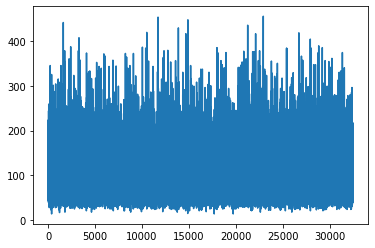

In [179]:
out_dataset['sentence_length'].plot()

분포도 나름 고른거 같고, 굳이 추가적인 작업이나 고려할것이 없을거 같음.

In [182]:
out_dataset.source.value_counts()

wikipedia          21620
wikitree           10672
policy_briefing      178
Name: source, dtype: int64

In [183]:
out_dataset[(out_dataset.source == 'policy_briefing')].head()

,id,sentence,subject_word,subject_idx,subject_type,object_word,object_idx,object_type,label,source,sentence_length
31,31,이어 “향후 우리 창업벤처기업들이 세계가 주목하는 줌(Zoom)과 페이스북(Facebook)과 같은 글로벌 플랫폼 기업으로 성장하도록 지원하고 대한민국이 ‘벤처 4대강국’으로 자리매김하도록 최선을 다할 계획”이라고 밝혔다.,Facebook,"(42, 49)",ORG,페이스북,"(37, 40)",ORG,org:alternate_names,policy_briefing,124
135,135,"한편, 러시아의 경우에도 러시아 측의 조치로 인해 올 3월부터 인천-모스크바 간 정기편 운항이 중단되며 러시아에 입국을 희망하던 많은 국내 기업인·학생 등 수요가 누적돼 있는 상황였다.",러시아,"(14, 16)",ORG,모스크바,"(38, 41)",LOC,org:members,policy_briefing,103
387,387,박능후 보건복지부 장관은 “코로나19를 극복하고 우리의 안전한 일상을 되찾기 위해서 치료제와 백신 확보가 무엇보다 중요하다”며 “임상시험 비용 지원 등을 위한 추경예산의 신속한 집행 등을 통해 국산 치료제와 백신이 조속히 확보 될 수 있도록 모든 역량을 결집하겠다”고 강조했다.,보건복지부,"(4, 8)",ORG,박능후,"(0, 2)",PER,org:top_members/employees,policy_briefing,155
848,848,"박능후 중앙재난안전대책본부 1차장(보건복지부 장관)은 24일 “코로나19 확산 추세는 다소 멈췄으나, 국내 하루 확진자 수는 백명 내외를 유지하고 있다”며 “수도권 비중은 여전히70% 수준을 차지하고 있고 산발적인 집단감염도 지역을 달리하며 발생하고 있어 긴장을 늦출 수 없는 상황”이라고 강조했다.",박능후,"(0, 2)",PER,보건복지부 장관,"(19, 26)",POH,per:title,policy_briefing,167
852,852,박영선 중소벤처기업부 장관이 내년 예산안과 관련해 브리핑을 하고 있다.,중소벤처기업부,"(4, 10)",ORG,박영선,"(0, 2)",PER,org:top_members/employees,policy_briefing,39
